## Modeling

Our question(s) of interest:

1. Can we predict contraceptive method of (1) no use, (2) short term, (3) long term?
2. Can we predict contraceptive method of (1) no use vs. (2) use?
3. Which of the two above has a better prediction accuracy? What are pros and cons of each?
4. Which model performs better: Logistic Regression or Random Forests?

In [1]:
# libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", context="talk")

from sklearn.model_selection import train_test_split
import re

In [2]:
# read in training data
contra_train = pd.read_csv('../../1-data/train.csv')
contra_test  = pd.read_csv('../../1-data/test.csv')

In [3]:
# examine data
contra_train.head()
contra_train.columns

Index(['contraceptive', 'age_bin_low', 'age_bin_high', 'median_marriage_age',
       'education_gap', 'contraceptive_use', 'wife_education_1',
       'husband_education_2', 'husband_education_3', 'husband_education_4',
       'wife_religion_1', 'wife_work_1', 'husband_occupation_2',
       'husband_occupation_3', 'husband_occupation_4', 'standard_living_2',
       'standard_living_3', 'media_exposure_1', 'education_gap_categorical_0',
       'education_gap_categorical_1', 'wife_age', 'num_child', 'kids_per_year',
       'est_years_married'],
      dtype='object')

## 1. Predicting Contraceptive: No Use, Short Term, Long Term

### Feature Selection and Data Preparation
We will start by running our model with all existing features in the dataset to evaluate initial performance.

In [4]:
# training data
# remove the first 2 because they are the response
# remove age_bin because they were used for another variable
# remove education_gap because it was coded into a categorical variable
X_train = contra_train.drop(['contraceptive', 'contraceptive_use', 'age_bin_low', 'age_bin_high', \
                             'education_gap', 'wife_age', 'num_child'], axis = 1)
Y_train = contra_train['contraceptive']

# test data
X_test = contra_test.drop(['contraceptive', 'contraceptive_use', 'age_bin_low', 'age_bin_high', \
                           'education_gap', 'wife_age', 'num_child'], axis = 1)
Y_test = contra_test['contraceptive']

### 1a. Multinomial Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression
multinomial_logit = LogisticRegression(multi_class='multinomial', solver='newton-cg')
multinomial_logit.fit(X = X_train, y = Y_train)

train_accuracy_lr = multinomial_logit.score(X = X_train, y = Y_train)
test_accuracy_lr  = multinomial_logit.score(X = X_test, y = Y_test)

[train_accuracy_lr, test_accuracy_lr]

[0.5520833333333334, 0.5184135977337111]

In [6]:
from sklearn.linear_model import LogisticRegressionCV
multinomial_logit_cv = LogisticRegressionCV(cv=10, multi_class='multinomial', solver='newton-cg')
multinomial_logit_cv.fit(X = X_train, y = Y_train)

train_accuracy_cv = multinomial_logit_cv.score(X = X_train, y = Y_train)
test_accuracy_cv  = multinomial_logit_cv.score(X = X_test, y = Y_test)

[train_accuracy_cv, test_accuracy_cv]

[0.5520833333333334, 0.5127478753541076]

In [9]:
# to track accuracy for features
accuracy_train = {}
accuracy_cv_train = {}
contra_df = contra_train.drop(['contraceptive', 'contraceptive_use', 'age_bin_low', \
                       'age_bin_high', 'education_gap'], axis = 1)
quantitative_features = ['median_marriage_age', 'wife_education_1', 'husband_education_2', \
                         'husband_education_3', 'husband_education_4', 'wife_religion_1', \
                         'wife_work_1', 'husband_occupation_2', 'husband_occupation_3', \
                         'husband_occupation_4', 'standard_living_2', 'standard_living_3', \
                         'media_exposure_1', 'education_gap_categorical_0', 'education_gap_categorical_1', \
                         'wife_age', 'num_child', 'kids_per_year', 'est_years_married']

for i in reversed(range(len(quantitative_features))):
    
    # The features to include in the ith model
    features = quantitative_features[:(i+1)]
    
    # The name we are giving to the ith model
    name = "+".join([name[0] for name in features])
    
    # subset dataframe
    X_train = contra_df[features]
    Y_train = contra_train['contraceptive']
    
    # initialize models
    model = LogisticRegression(multi_class='multinomial', solver='newton-cg')
    model_cv = LogisticRegressionCV(cv=10, multi_class='multinomial', solver='newton-cg')
    
    # fit models
    model.fit(X = X_train, y = Y_train)
    model_cv.fit(X = X_train, y = Y_train)
    train_model = model.score(X = X_train, y = Y_train)
    train_model_cv = model_cv.score(X = X_train, y = Y_train)
    
    # Saving the ith model
    accuracy_train[name] = train_model
    accuracy_cv_train[name] = train_model_cv

accuracy_train

{'m+w+h+h+h+w+w+h+h+h+s+s+m+e+e+w+n+k+e': 0.5416666666666666,
 'm+w+h+h+h+w+w+h+h+h+s+s+m+e+e+w+n+k': 0.5416666666666666,
 'm+w+h+h+h+w+w+h+h+h+s+s+m+e+e+w+n': 0.5369318181818182,
 'm+w+h+h+h+w+w+h+h+h+s+s+m+e+e+w': 0.5113636363636364,
 'm+w+h+h+h+w+w+h+h+h+s+s+m+e+e': 0.4876893939393939,
 'm+w+h+h+h+w+w+h+h+h+s+s+m+e': 0.48484848484848486,
 'm+w+h+h+h+w+w+h+h+h+s+s+m': 0.48390151515151514,
 'm+w+h+h+h+w+w+h+h+h+s+s': 0.48579545454545453,
 'm+w+h+h+h+w+w+h+h+h+s': 0.49053030303030304,
 'm+w+h+h+h+w+w+h+h+h': 0.48390151515151514,
 'm+w+h+h+h+w+w+h+h': 0.48579545454545453,
 'm+w+h+h+h+w+w+h': 0.4706439393939394,
 'm+w+h+h+h+w+w': 0.45170454545454547,
 'm+w+h+h+h+w': 0.45549242424242425,
 'm+w+h+h+h': 0.4640151515151515,
 'm+w+h+h': 0.4630681818181818,
 'm+w+h': 0.4346590909090909,
 'm+w': 0.4308712121212121,
 'm': 0.42613636363636365}

In [13]:
# modified df
contra_df = contra_train.drop(['contraceptive', 'contraceptive_use', 'age_bin_low', \
                       'age_bin_high', 'education_gap'], axis = 1)

quantitative_features = ['median_marriage_age', 'wife_education_1', 'wife_religion_1', \
                         'wife_work_1', 'media_exposure_1', 'wife_age', 'num_child', \
                         'kids_per_year', 'est_years_married']

# to track accuracy for features
accuracy_train = {}
accuracy_cv_train = {}

# loop through feature removal
for i in range(len(quantitative_features)):
    
    # The features to include in the ith model
    #features = quantitative_features[:(i+1)]
    
    # The name we are giving to the ith model
    #name = "-".join([name[i] for name in features])
    name = quantitative_features[i]
    
    # subset dataframe
    X_train = contra_df.drop(quantitative_features[i], axis = 1)
    Y_train = contra_train['contraceptive']
    
    # initialize models
    model = LogisticRegression(multi_class='multinomial', solver='newton-cg')
    model_cv = LogisticRegressionCV(cv=10, multi_class='multinomial', solver='newton-cg')
    
    # fit models
    model.fit(X = X_train, y = Y_train)
    model_cv.fit(X = X_train, y = Y_train)
    train_model = model.score(X = X_train, y = Y_train)
    train_model_cv = model_cv.score(X = X_train, y = Y_train)
    
    # Saving the ith model
    accuracy_train[name] = train_model
    accuracy_cv_train[name] = train_model_cv

accuracy_train

{'median_marriage_age': 0.5464015151515151,
 'wife_education_1': 0.5340909090909091,
 'wife_religion_1': 0.5492424242424242,
 'wife_work_1': 0.5435606060606061,
 'media_exposure_1': 0.5359848484848485,
 'wife_age': 0.540719696969697,
 'num_child': 0.5501893939393939,
 'kids_per_year': 0.5369318181818182,
 'est_years_married': 0.5416666666666666}

[Text(0, 0, 'median_marriage_age'),
 Text(0, 0, 'wife_education_1'),
 Text(0, 0, 'wife_religion_1'),
 Text(0, 0, 'wife_work_1'),
 Text(0, 0, 'media_exposure_1'),
 Text(0, 0, 'wife_age'),
 Text(0, 0, 'num_child'),
 Text(0, 0, 'kids_per_year'),
 Text(0, 0, 'est_years_married')]

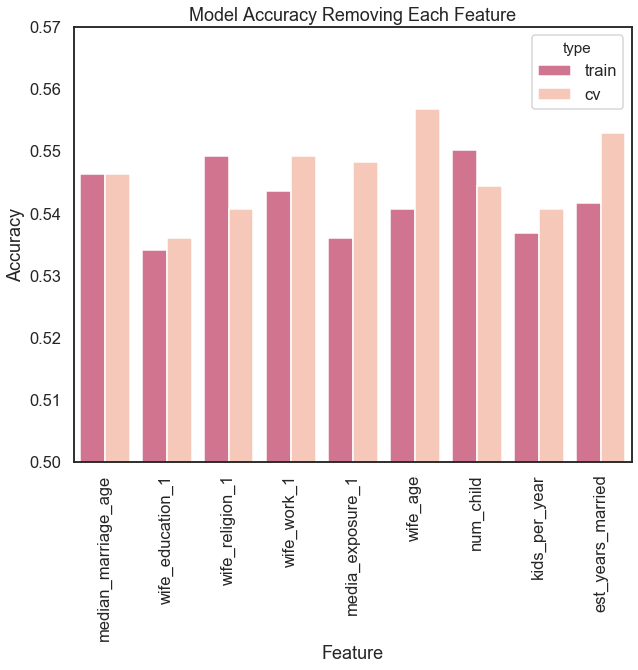

In [57]:
# prepare train df for plotting
accuracy_train_df = pd.DataFrame(accuracy_train.items(), columns = ['feature','accuracy'])
accuracy_train_df['type'] = 'train'

# prepare cv df for plotting
accuracy_cv_train_df = pd.DataFrame(accuracy_cv_train.items(), columns = ['feature','accuracy'])
accuracy_cv_train_df['type'] = 'cv'

# combine datasets
accuracy_df = pd.concat([accuracy_train_df, accuracy_cv_train_df])
#accuracy_df.sort_values(['accuracy'], ascending = True)

# generate plot
plt.figure(figsize=(10,8))
ax = sns.barplot(x = 'feature', y = 'accuracy', hue = 'type', data = accuracy_df,
                palette=['#DF6589', '#FFC3AF'])
plt.ylim(0.5, 0.57)
ax.set(xlabel='Feature',
       ylabel='Accuracy',
       title='Model Accuracy Removing Each Feature');
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

### 1b. Random Forests

In [13]:
from sklearn import ensemble
random_forest = ensemble.RandomForestClassifier(n_estimators=20)
random_forest.fit(X = X_train, y = Y_train)

train_accuracy_rf = random_forest.score(X = X_train, y = Y_train)
test_accuracy_rf = random_forest.score(X = X_test, y = Y_test)

[train_accuracy_rf, test_accuracy_rf]

[0.9545454545454546, 0.5042492917847026]

## 2. Predicting Binary Contraceptive: No vs. Yes

### Feature Selection and Data Preparation

In [14]:
# training data
X_train_binary = contra_train.drop(['contraceptive', 'contraceptive_use', 'age_bin_low', 'age_bin_high', \
                                    'education_gap', 'wife_age'], axis = 1)
Y_train_binary = contra_train['contraceptive_use']

# test data
X_test_binary = contra_test.drop(['contraceptive', 'contraceptive_use', 'age_bin_low', 'age_bin_high', \
                                  'education_gap', 'wife_age'], axis = 1)
Y_test_binary = contra_test['contraceptive_use']

### 2a. Multinomial Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
binary_logit = LogisticRegression(solver = 'newton-cg')
binary_logit.fit(X = X_train_binary, y = Y_train_binary)

train_accuracy_lr_binary = binary_logit.score(X = X_train_binary, y = Y_train_binary)
test_accuracy_lr_binary  = binary_logit.score(X = X_test_binary, y = Y_test_binary)

[train_accuracy_lr_binary, test_accuracy_lr_binary]

[0.6998106060606061, 0.7110481586402266]

In [16]:
from sklearn.linear_model import LogisticRegressionCV
binary_logit_cv = LogisticRegressionCV(cv = 10, solver = 'newton-cg')
binary_logit_cv.fit(X = X_train_binary, y = Y_train_binary)

train_accuracy_cv_binary = binary_logit_cv.score(X = X_train_binary, y = Y_train_binary)
test_accuracy_cv_binary  = binary_logit_cv.score(X = X_test_binary, y = Y_test_binary)

[train_accuracy_cv_binary, test_accuracy_cv_binary]

[0.7007575757575758, 0.7053824362606232]

### 2b. Random Forests

In [17]:
from sklearn import ensemble
binary_random_forest = ensemble.RandomForestClassifier(n_estimators = 20)
binary_random_forest.fit(X = X_train_binary, y = Y_train_binary)

train_accuracy_rf_binary = binary_random_forest.score(X = X_train_binary, y = Y_train_binary)
test_accuracy_rf_binary  = binary_random_forest.score(X = X_test_binary, y = Y_test_binary)

[train_accuracy_rf_binary, test_accuracy_rf_binary]

[0.978219696969697, 0.6798866855524079]

## 3. Predicting Contraceptive of Those Who Use: Short-term vs. Long-term

### Feature Selection and Data Preparation

In [18]:
contra_train.columns

Index(['contraceptive', 'age_bin_low', 'age_bin_high', 'median_marriage_age',
       'education_gap', 'contraceptive_use', 'wife_education_1',
       'husband_education_2', 'husband_education_3', 'husband_education_4',
       'wife_religion_1', 'wife_work_1', 'husband_occupation_2',
       'husband_occupation_3', 'husband_occupation_4', 'standard_living_2',
       'standard_living_3', 'media_exposure_1', 'education_gap_categorical_0',
       'education_gap_categorical_1', 'wife_age', 'num_child', 'kids_per_year',
       'est_years_married'],
      dtype='object')

In [19]:
# data preprocessing
contra_train_use = contra_train[contra_train['contraceptive_use'] == 1]
contra_test_use = contra_test[contra_test['contraceptive_use'] == 1]

# training data
X_train_use = contra_train_use.drop(['contraceptive', 'contraceptive_use', 'age_bin_low', 'age_bin_high', \
                                     'education_gap', 'wife_education_1', 'wife_work_1', 'wife_age'], axis = 1)
Y_train_use = contra_train_use['contraceptive']

# test data
X_test_use = contra_test_use.drop(['contraceptive', 'contraceptive_use', 'age_bin_low', 'age_bin_high', \
                                   'education_gap', 'wife_education_1', 'wife_work_1', 'wife_age'], axis = 1)
Y_test_use = contra_test_use['contraceptive']

### 3a. Multinomial Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
binary_use_logit = LogisticRegression(solver = 'newton-cg')
binary_use_logit.fit(X = X_train_use, y = Y_train_use)

train_accuracy_lr_use = binary_use_logit.score(X = X_train_use, y = Y_train_use)
test_accuracy_lr_use  = binary_use_logit.score(X = X_test_use, y = Y_test_use)

[train_accuracy_lr_use, test_accuracy_lr_use]

[0.6705685618729097, 0.6543778801843319]

In [21]:
from sklearn.linear_model import LogisticRegressionCV
binary_use_logit_cv = LogisticRegressionCV(cv = 10, solver = 'newton-cg')
binary_use_logit_cv.fit(X = X_train_use, y = Y_train_use)

train_accuracy_cv_use = binary_use_logit_cv.score(X = X_train_use, y = Y_train_use)
test_accuracy_cv_use  = binary_use_logit_cv.score(X = X_test_use, y = Y_test_use)

[train_accuracy_cv_use, test_accuracy_cv_use]

[0.6705685618729097, 0.663594470046083]

### 3b. Random Forests

In [22]:
from sklearn import ensemble
binary_use_random_forest = ensemble.RandomForestClassifier(n_estimators = 20)
binary_use_random_forest.fit(X = X_train_use, y = Y_train_use)

train_accuracy_rf_use = binary_use_random_forest.score(X = X_train_use, y = Y_train_use)
test_accuracy_rf_use  = binary_use_random_forest.score(X = X_test_use, y = Y_test_use)

[train_accuracy_rf_use, test_accuracy_rf_use]

[0.9431438127090301, 0.6589861751152074]